In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix, plot_confusion_matrix,roc_curve,roc_auc_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


In [7]:
data = pd.read_csv('creditcard.csv',sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()
#no null values at all

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.shape

(284807, 31)

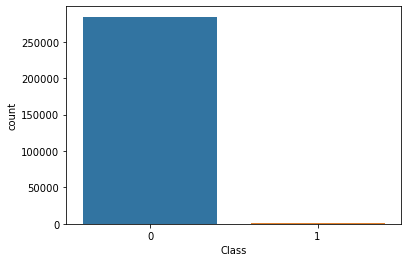

In [5]:
sns.countplot(data.Class)

In [6]:
data['Class'].value_counts()
#highly imbalanced dataset either we have to do under sampling or over sampling
#in this notebook, will do under sampling

0    284315
1       492
Name: Class, dtype: int64

In [7]:
print('Normal transactions is', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of total transactions')

Normal transactions is 99.83 % of total transactions


In [8]:
#checking how the algorithms work and their score if we have an imbalanced dataset
y = data['Class']
X = data.drop(['Class'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

XGBClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.94      0.82      0.87        93

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



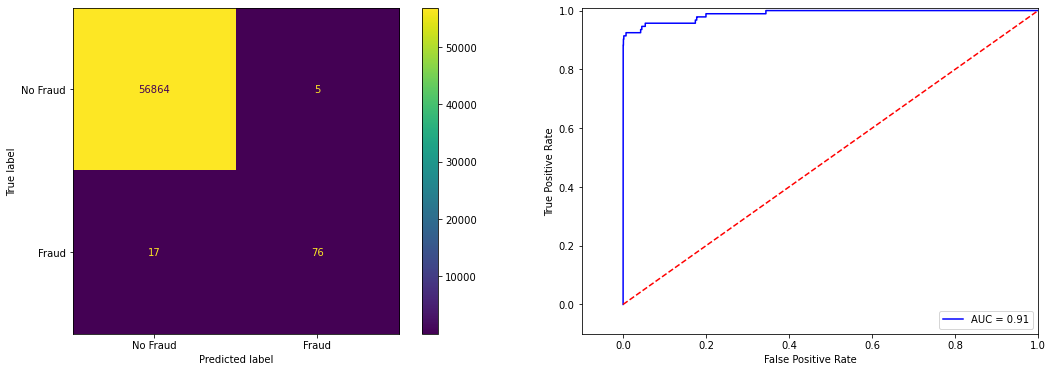

Accuracy score: 0.9996
AUC score: 0.9086
Recall score: 0.8172


---------------------------------------------------------------------------------------------------------------------------


LogisticRegression


C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.69      0.69      0.69        93

    accuracy                           1.00     56962
   macro avg       0.84      0.84      0.84     56962
weighted avg       1.00      1.00      1.00     56962



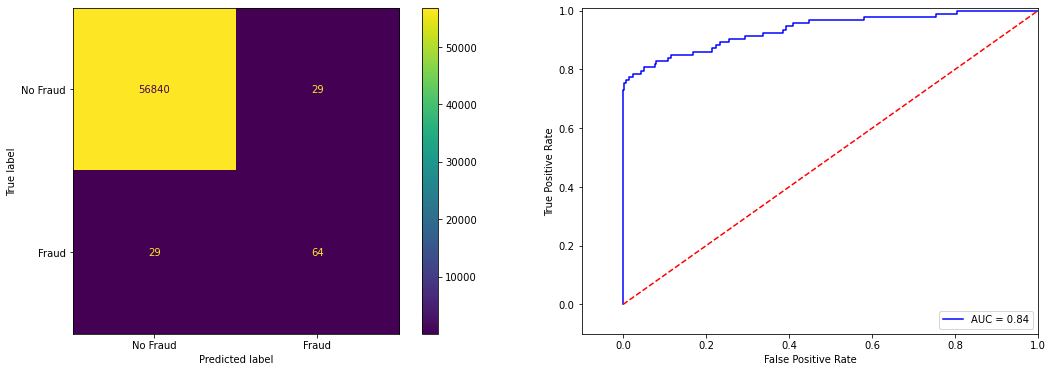

Accuracy score: 0.999
AUC score: 0.8438
Recall score: 0.6882


---------------------------------------------------------------------------------------------------------------------------


RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.94      0.82      0.87        93

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



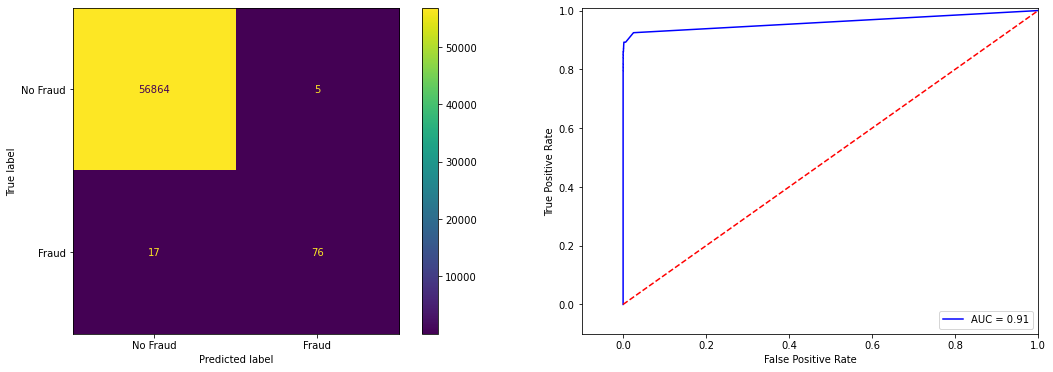

Accuracy score: 0.9996
AUC score: 0.9086
Recall score: 0.8172


---------------------------------------------------------------------------------------------------------------------------




In [9]:
models = [XGBClassifier(random_state=0, n_jobs=-1, verbosity=0, use_label_encoder=False), LogisticRegression(), RandomForestClassifier()]

for model in models:
    
    print(type(model).__name__)
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:,1]
    y_pred = model.predict(X_test)
    
    Conf_Mat = confusion_matrix(y_test, y_pred)
    figs, axes = plt.subplots(1,2, figsize=(18,6))
    labels = ['Normal', 'Fraud']
    disp = plot_confusion_matrix(model, X_test, y_test, display_labels=labels,  ax=axes[0])
    
    Class_rep = classification_report(y_test, y_pred)
    print(Class_rep)
    
    fpr, tpr, Threshold = roc_curve(y_test, y_pred_prob)
    plt.title('')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc_score(y_test, y_pred))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.show()
    
    #disp = plot_precision_recall_curve(model, X_test, y_test, ax=axes)

    print('Accuracy score:', accuracy_score(y_test, y_pred).round(4))
    print('AUC score:', roc_auc_score(y_test, y_pred).round(4))
    print('Recall score:', recall_score(y_test, y_pred).round(4))
    
    print('\n')
    print('---' * 41)
    print('\n')

In [2]:
import imblearn

In [9]:
from imblearn.under_sampling import RandomUnderSampler  
#balanicng the dataset
under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(X, y)

In [12]:
y_res.value_counts()

1    492
0    492
Name: Class, dtype: int64

In [13]:
X_res

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,166222.0,-0.247216,1.100930,-0.388380,-0.720693,0.455065,-0.733734,0.671936,0.256055,-0.189847,...,-0.100892,-0.262558,-0.706375,0.044445,-0.719598,-0.356141,0.186662,0.119784,0.028709,9.82
1,135072.0,-2.388038,-1.416006,0.488192,-0.783987,1.391646,1.362345,1.978337,-0.285239,-0.149457,...,-0.044970,-0.436593,-0.499718,-0.310048,-1.560120,0.396509,0.564281,0.195006,-0.579195,466.57
2,130540.0,0.050392,0.804291,0.279098,-0.575808,0.311745,-1.155496,0.938868,-0.149615,0.110831,...,-0.111156,-0.273532,-0.653252,0.076685,0.011609,-0.526335,0.141246,0.241470,0.095029,0.89
3,170948.0,-4.459027,4.685614,-2.359614,-1.392585,0.492355,3.144500,-4.098494,-14.991463,1.063316,...,-2.884595,14.148062,-5.718185,2.164900,-0.573397,0.007869,0.235653,0.702392,0.000845,13.36
4,3756.0,1.120127,-0.632524,0.688376,-0.572407,-0.410379,0.872871,-0.896861,0.278541,0.426932,...,-0.021732,-0.076881,-0.029066,0.275598,-0.702273,-0.158219,-0.417087,0.049002,0.012652,50.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
980,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
981,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
982,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=22)

In [15]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
617,41285.0,-12.835760,6.574615,-12.788462,8.786257,-10.723121,-2.813536,-14.248847,7.960521,-7.718751,...,-0.617296,2.679490,-0.047335,-0.836982,0.625349,0.125865,0.177624,-0.817680,-0.521030,37.32
49,162994.0,0.113107,0.913794,-0.522777,-0.725653,1.073134,-0.279381,0.803981,0.122428,-0.176723,...,-0.012653,-0.311305,-0.813305,0.064629,0.167304,-0.452052,0.120392,0.216179,0.069147,3.96
646,46149.0,-1.346509,2.132431,-1.854355,2.116998,-1.070378,-1.092671,-2.230986,1.036425,-1.895516,...,0.221919,0.609508,0.202874,-0.060791,-0.186733,-0.017401,-0.283751,0.395451,0.233139,1.00
40,77972.0,1.179358,-0.526142,0.979373,-0.679928,-1.351950,-0.586655,-0.772560,0.192636,2.083565,...,-0.290021,0.014816,0.232796,0.056967,0.372085,0.319484,-0.670700,0.098115,0.031099,1.00
22,171190.0,-0.356790,1.627155,1.342871,4.351850,-0.060764,1.206407,-0.403402,0.725594,-1.442228,...,0.201740,0.274481,0.985447,-0.205745,-0.697451,-0.549191,0.549728,0.375020,0.198471,1.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,48154.0,1.240506,0.105571,0.372484,0.439473,-0.369716,-0.509642,-0.130081,0.030737,-0.010496,...,-0.149479,-0.241352,-0.790199,0.098431,-0.034886,0.190600,0.101502,-0.041052,0.002859,1.29
960,157207.0,1.170756,2.501038,-4.986159,5.374160,0.997798,-1.259004,-1.237689,0.358426,-2.612489,...,0.227618,0.123145,-0.713201,-0.080868,-0.964310,0.338568,0.068630,0.481588,0.268226,4.97
812,94364.0,-15.192064,10.432528,-19.629515,8.046075,-12.838167,-1.875859,-21.359738,-3.717850,-5.969782,...,1.657476,-3.474097,1.765446,1.701257,0.381587,-1.413417,-1.023078,-2.634761,-0.463931,1.00
132,61478.0,1.205972,0.278552,0.294610,1.138072,-0.319752,-0.928388,0.196292,-0.232454,0.013336,...,-0.099324,0.149952,0.455980,-0.182655,0.412263,0.760077,-0.220734,0.012488,0.022726,24.00


In [16]:
y_train

617    1
49     0
646    1
40     0
22     0
      ..
356    0
960    1
812    1
132    0
885    1
Name: Class, Length: 787, dtype: int64

XGBClassifier
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        93
           1       0.98      0.94      0.96       104

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



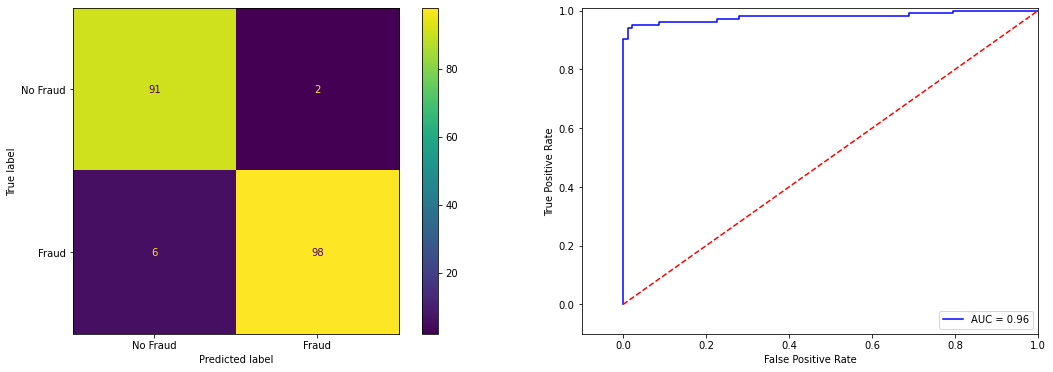

Accuracy score: 0.9594
AUC score: 0.9604
Recall score: 0.9423


---------------------------------------------------------------------------------------------------------------------------


LogisticRegression
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        93
           1       1.00      0.88      0.93       104

    accuracy                           0.93       197
   macro avg       0.94      0.94      0.93       197
weighted avg       0.94      0.93      0.93       197



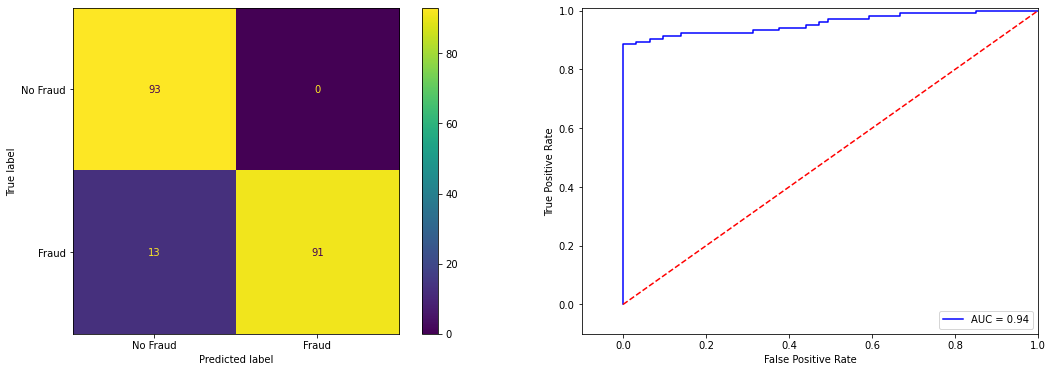

Accuracy score: 0.934
AUC score: 0.9375
Recall score: 0.875


---------------------------------------------------------------------------------------------------------------------------


RandomForestClassifier
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        93
           1       0.99      0.93      0.96       104

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



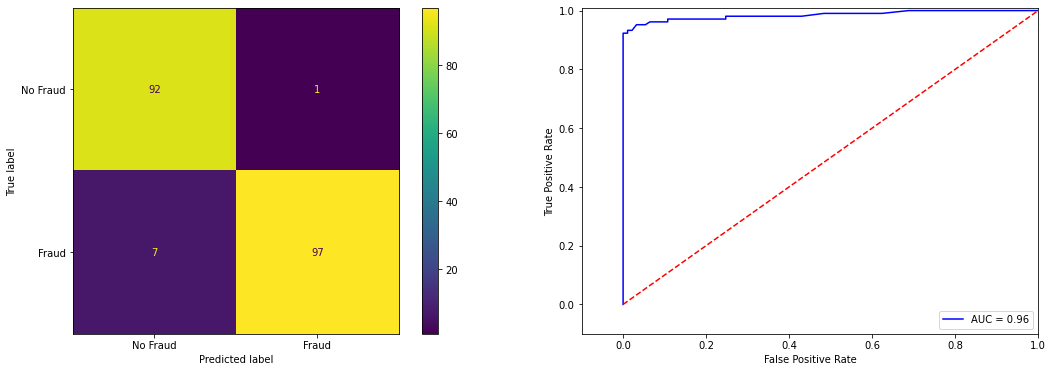

Accuracy score: 0.9594
AUC score: 0.961
Recall score: 0.9327


---------------------------------------------------------------------------------------------------------------------------




In [17]:
models = [XGBClassifier(random_state=0, n_jobs=-1, verbosity=0, use_label_encoder=False), LogisticRegression(), RandomForestClassifier()]

for model in models:
    
    print(type(model).__name__)
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:,1]
    y_pred = model.predict(X_test)
    
    Conf_Mat = confusion_matrix(y_test, y_pred)
    figs, axes = plt.subplots(1,2, figsize=(18,6))
    labels = ['No Fraud', 'Fraud']
    disp = plot_confusion_matrix(model, X_test, y_test, display_labels=labels,  ax=axes[0])
    
    Class_rep = classification_report(y_test, y_pred)
    print(Class_rep)
    
    fpr, tpr, Threshold = roc_curve(y_test, y_pred_prob)
    plt.title('')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc_score(y_test, y_pred))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    #disp = plot_precision_recall_curve(model, X_test, y_test, ax=axes)

    print('Accuracy score:', accuracy_score(y_test, y_pred).round(4))
    print('AUC score:', roc_auc_score(y_test, y_pred).round(4))
    print('Recall score:', recall_score(y_test, y_pred).round(4))
    
    print('\n')
    print('---' * 41)
    print('\n')

In [ ]:
#score are pretty good and confusion looks better now
Random forest and XGboost are equally better